<div style="border:solid lightblue 3px; padding: 20px">

**Привет!**

Меня зовут Алексей Манелюк, я буду проверять твой проект. Предлагаю общаться на "ты" 😉, но если неудобно - скажи и будем на "вы".

Моя основная цель - не указать на совершенные тобой ошибки, а поделиться своим опытом и помочь тебе стать крутым аналитиком данных. Тобой проделана большая работа над проектом, 
но давай сделаем его еще лучше. В тексте проекта ты увидишь мои комментарии, пожалуйста не удаляй и не изменяй их. У комментариев могут быть приписки **V2**, **V3** и т.д., которые соответствуют версии проверки. Я буду использовать цветовую разметку:
<p>
<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

Так выделены самые важные замечания. Без их отработки я не смогу принять проект. </div>

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Так выделены небольшие замечания. Не более трёх таких замечаний допустимы. Если их много - постарайся исправить их.</div>
<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Так выделены все остальные комментарии.</div>

Предлагаю работать в диалоге: если что-то дорабатываешь или отвечаешь на мой комментарий - пиши об этом и мне будет удобней, если ты выделишь свои комментарии:
<p>
<div class="alert-info">
<b>Комментарий студента</b>

Например, так.</div>

Все это поможет мне быстрее принять твой проект.</div>

# Определение перспективного тарифа для телеком компании
В качестве аналитика данных в компании "Мегалайн" мне необходимо проанализировать данные для того, чтобы понять, какой тариф приносит больше выручки самой компании, чтобы в дальнейшем скорректировать рекоаамный бюджет. 
Нужно проанализировать поведение 500 клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
*Тариф «Смарт»*
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
1. минута разговора: 3 рубля
2. сообщение: 3 рубля
3. 1 Гб интернет-трафика: 200 рублей


*Тариф «Ультра»*
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
1. минута разговора: 1 рубль
2. сообщение: 1 рубль
3. 1 Гб интернет-трафика: 150 рублей

**Шаги, которые будем предпринимать в проекте:**
  1. Открыть файлы с данными и изучить общую информацию
  2. Подготовка данных
  3. Анализ данных
  4. Проверка гипотез
  5. Выводы 

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Отлично что во вступлении пишешь подробный бриф, цели исследования, план работы, а также описание тарифов. 👍
</div>

## Изучение общей информации


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns


In [2]:
#Импорт данных в моем случае: 
#users = pd.read_csv('users.csv')
#calls = pd.read_csv('calls.csv')
#messages = pd.read_csv('messages.csv')
#internet= pd.read_csv('internet.csv', index_col=0)
#tariffs = pd.read_csv('tariffs.csv')

#Импорт данных для тебя: 
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
# получение первых 5 строк таблицы calls
print(calls.head(10))
# просмотрим информацию по этим данным
calls.info()

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
5  1000_5  2018-11-02      0.00     1000
6  1000_6  2018-10-18      0.00     1000
7  1000_7  2018-08-22     18.31     1000
8  1000_8  2018-09-15     18.44     1000
9  1000_9  2018-08-15      0.00     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Данные загружены верно, получена первая общая информация о датасете. 🚀

В конце раздела имеет смысл писать краткий вывод - что было сделано и зачем, какие результаты получены.</div>

### Предобработка данных calls
1. Изменим данные к формату datetime64
2. Добавим месяц для сводной в таблицу 
3. Сделаем поминутную тарификацию (округлим звонки)
4. Посмотрим на "нулевые" звонки.

In [4]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Судя по значениям среднего и медианы для продолжительности звонков - данные должны быть распределены более или менее равномерно, с явными выбросами справа. 

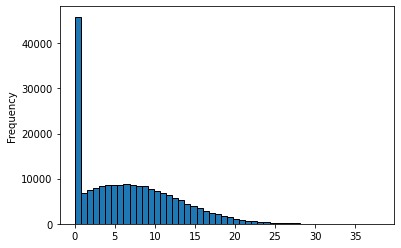

In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month 
# Посмотрим на гистограмму распределения длительности звонков:
calls['duration'].plot(kind='hist', ec='black', bins=50)
plt.show()


In [6]:
#Проверим нулевые значения продолжительности разговора.
calls.duration.value_counts()

0.00     39613
5.50       142
4.49       142
6.15       141
6.38       141
         ...  
26.32        1
24.51        1
27.24        1
29.89        1
27.43        1
Name: duration, Length: 2871, dtype: int64

In [7]:
# проверим какая часть звонков "сбрасывается"
"Сброшенных звонков: {:.2%} от всего количества в базе".format(39613/202607)  

'Сброшенных звонков: 19.55% от всего количества в базе'

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Такой хардкодинг лучше в работе не использовать. Целесообразней рассчитать этот процент через переменные.</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Поняла, в последующих проектах так делать не буду. Сейчас страшно что-то исправлять.</div>

In [8]:
# сколько вообще клиентов по базе звонков
calls.user_id.value_counts()  

1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64

In [9]:
# сколько клиентов и сколько раз пришлось перезванивать
call_null = calls.query('duration == 0')
call_null.user_id.value_counts()

1377    336
1168    308
1453    295
1375    290
1196    262
       ... 
1397      6
1442      5
1424      5
1084      5
1406      5
Name: user_id, Length: 492, dtype: int64

Cрывы звонков у всех клиентов (492 человека) в той или иной степени. Но такое случается. 

In [10]:
#calls['duration'] = calls['duration'].replace(0.0, 1)
#calls.duration.min()   # проверим какое минимальное значение фиксирует система

~~Система регистрирует звонки с 0,01 минуты. Значит 0,0 во времени звонка - системная ошибка. Но так как все значения времении на звонок мы округлим до ближайшего целого (вверх). Логика замены 0,0 на 1 верная.~~

Проверим на дубликаты

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

В задании сказано: "В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять." Округление до минуты исказит статистику и выручку.</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Изменила, ошибку поняла.</div>

In [11]:
calls.duplicated().sum()

0

In [12]:
# Округлим значения "времени разговора" до целых значений в соответсвии с правилами тарифа
calls.duration = calls.duration.apply(np.ceil).astype('int') # округляем вверх до целого значения
calls.sample(3)

,id,call_date,duration,user_id,month
174423,1431_112,2018-10-12,0,1431,10
47534,1118_823,2018-10-18,3,1118,10
133986,1342_124,2018-12-03,2,1342,12


<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Округление произведено правильно.</div>

<AxesSubplot:ylabel='Frequency'>

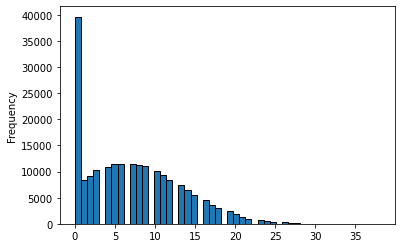

In [13]:
calls['duration'].plot(kind='hist', ec='black', bins=50)

**Общая информация по результатам предварительного осмотра и "чистки" базы звонков:**
1. Пропущенных данных нет.
2. Данные по датам звонков перевели в соответствующий формат.
3. Создали столбец по месяцам дат звонков
4. В базе почти 20% звонков имеют значение 0.0 - скорее всего это ошибки регистрации времени разговора продолжительности меньше 1 минуты, поскольку других возможных объяснений такой ситуации не нашли - все нулевые записи продолжительности звонков заменили на минимальное пороговое значение 1 минута.
5. Дубликатов не обнаружено.


### Изучение internet

In [14]:
# проверка# проверка
print(internet.info())
print(internet.head())
internet.tail() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None
       id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000


,id,mb_used,session_date,user_id
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499
149395,1499_156,544.37,2018-10-26,1499


<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>
    
`Unnamed: 0` возникает, когда данные сохраняют с указанием индекса `pd.DataFrame().to_csv(..., index=column)`. Если при чтении указать этот столбец `pd.read_csv(..., index_col=0)` - данные сразу прочитаются корректно.</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Изменила, спасибо за совет)</div>

### Предобработка данных по базе интернета:
- Пропущенных значений нет.
- Даты надо преобразовать в соответсвующий тип данных
- Нужно создать столбец с датой интернет сессий по месяцам
- Проверить нет ли нулевых значений использованных мегабайт.
- Даты сессий в интернете нужно перевести во временной тип данных. Ещё раз взглянем на задание: «Мегалайн» всегда округляет вверх значения минут и мегабайт. 




<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>
    
Мы же здесь рассматриваем интернет-сессии, при чем здесь "Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута."?</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Извините, ошиблась) Эту фразу убрала.</div>

In [15]:
# переведем столбец дата сессии в тип данных - datetime
internet.session_date = pd.to_datetime(internet.session_date)

# создадим столбец с датой приведенной к значению месяца
internet['month'] = internet['session_date'].dt.month

In [16]:
#Проверим на дубликаты
internet.duplicated().sum() #дубликатов нет

0

In [17]:
# Проверим сколько данных нулевых гигабайт в базе
internet.mb_used.value_counts()

0.00      19598
335.91        9
447.30        9
197.56        9
199.11        8
          ...  
182.69        1
726.03        1
315.12        1
898.99        1
677.66        1
Name: mb_used, Length: 70003, dtype: int64

В базе более 10% нулевых значений использованных мегабайт. ~~По аналогии с базой звонков можем предположить что такая же ситуация с мегабайтами - меньше какого-то значения система не учитывает трафик. Если запись есть в таблице то соединение произошло. Для расчетов все данные по трафику округлим до ближайшего целого в большую сторону. Так как других возможностей узнать подробности такой ситуации у нас нет принимает вариант замены нулевых значений на мин. "оплачиваемое" значение 1 мегабайт - интернет сессия состоялась.~~  
Стоит предположить, что нулевые значения- это неудачные попытки выйти в интернет. 

In [18]:
#internet.mb_used = internet.mb_used.replace(0.0, 1)
#internet.mb_used.min()  # проверим мин. значение фисируемое системой

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Я бы предположил, что нулевые значения - это неудачные попытки выйти в интернет и не стал бы округлять до 1 Мб.</div>

In [19]:
#округляем
#internet.mb_used = internet.mb_used.apply(np.ceil).astype('int')  # округляем до ближайшего целого вверх
#internet.mb_used.sort_values()

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

На данном этапе округлять сессии нецелесообразно. В условии задания сказано: "для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта".</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Предположение исправлено, округление производится не будет.</div>

<div class="alert-success">
<b>Комментарий ревьюера V2 ✔️</b>

Теперь правильно!</div>

**Общая информация по результатам предварительного осмотра и "чистки" базы доступа в интернет:**
- Пропущенных данных нет.
- Данные по датам перевели в соответствующий формат.
- Создали столбец по месяцам
- Дубликатов не обнаружено.


### Предобработка данных сообщений:

In [20]:
messages.head()  # проверка

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [21]:
messages.info()  # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Получается, что:
- Пропущенных значений нет.
- Даты надо преобразовать в соответсвующий тип данных
- Нужно создать столбец с датой отправки сообщения по месяцам

In [22]:
# переведем столбец дата сообщения в тип данных - datetime
messages.message_date = pd.to_datetime(messages.message_date)

# создадим столбец с датой приведенной к значению месяца
messages['month'] = messages['message_date'].dt.month

messages.info()  # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [23]:
# Проверим на дубликаты

messages.duplicated().sum()

0

Нет дубликатов

**Общая информация по результатам предварительного осмотра и "чистки" базы звонков:**
- Пропущенных данных нет.
- Данные по датам сообщений перевели в соответствующий формат.
- Создали столбец по месяцам дат сообщений
- Дубликатов не обнаружено.

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Информация по сообщениям обработана правильно.</div>

### Предобработка по тарифам

In [24]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [25]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Общая информация по результатам предварительного осмотра базы доступа о тарифах:**
Пропущенных данных нет.
База информационная - о предоставялемых услугах и стоимости тарифов

1. Тариф «Смарт»

  - Ежемесячная плата: 550 рублей
  - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
  - Стоимость услуг сверх тарифного пакета:
          •   минута разговора: 3 рубля (округление до 1 минуты.)
          •   сообщение: 3 рубля
          •   1 Гб интернет-трафика: 200 рублей 
2. Тариф «Ультра»

  - Ежемесячная плата: 1950 рублей
  - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
  - Стоимость услуг сверх тарифного пакета:
          •   минута разговора: 1 рубль (округление до 1 минуты.)
          •   сообщение: 1 рубль
          •   1 Гб интернет-трафика: 150 рублей

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Информация по тарифам загружена правильно.</div>

### Предобработка данных о клиентах

In [26]:
print(users.info())
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


- Всего 500 записей - клиентов. 
- Только 38 клиентов прекратили сотрудничество - можно рассмотреть подробнее.
- Данные по дате нужно перевести в подходящий формат.
 - Нам понадобится отчет по месяцам - нужно создать соответствующий столбец
- Данные по городам нужно рассмотреть по необходимости нормализировать - перевести в строчный формат, потом обратно в читаемый, во избежании пропуска дубликтов
- ФИО клиента нужно сложить в один столбец, также провести нормализацию.
- Посмотрим все прерванные контракты

In [27]:
churn_date_null = users[~users.churn_date.isnull()]
churn_date_null

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


In [28]:
# переведем столбцы дат в тип данных - datetime
users.churn_date = pd.to_datetime(users.churn_date)
users.reg_date = pd.to_datetime(users.reg_date)
# создадим столбец с датой приведенной к значению месяца
users['month'] = users['reg_date'].dt.month
users.info()  # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
 8   month       500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.3+ KB


In [29]:
# Нормализируем данные по городам.

users.city = users.city.str.lower()  # все строчные
users.city = users.city.str.title()  # все с заглавной буквы
# по Ростову все-таки будет ошибка.
users.city = users.city.replace('Ростов-На-Дону', 'Ростов-на-Дону')
users.city.unique()  # проверка городов через дефис.

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [30]:
# Имена и фамилии и также нормализуем

users.first_name = users.first_name.str.lower()  # все строчные
users.last_name = users.last_name.str.lower()  # все строчные
users.first_name = users.first_name.str.title()  # все с заглавной буквы
users.last_name = users.last_name.str.title()  # все с заглавной буквы
users.head()  # проверка 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [31]:
users.age.describe()  # состав клиентов по возрасту

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [32]:
users.duplicated().sum() #дубликатов нет

0

**Общая информация по результатам предварительного осмотра и "чистки" базы клиентов:**
- 500 записей клиентов.
- Только 38 не пропущенных значение в столбце дата прекращения пользования тарифом. Удалять пропущенные значения нет смысла так как другие данные по этим клиентам как раз нам понадобяться.
- Данные по датам перевели в соответствующий формат.
- Создали столбец по месяцам даты закрытия контракта 
- Данные по городам и ФИО клиента нормализовали. 
- ФИО клиента занесли в один столбец в формате "Имя Фамилия".
- Возрастной состав базы "хороший" - охват аудитории равномерный "от мала до велика", средняя и медиана равны - распределение равномерное.

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Круто, что копнула поглубже и изучила подробно клиентскую базу. Также можно проверить пользователей на уникальность.</div>

### Подготовка данных для расчетов:
Посчитаем для каждого пользователя по месяцам:
1. Количество сделанных звонков
2. Количество израсходованных минут разговора
3. Количество отправленных сообщений
4. Объем израсходованного интернет-трафика
5. Выручку с каждого пользователя

In [33]:
# Cоздадим сводную таблицу с подсчетом количества звонков и кол-ва израсходованных минут по месяцам для каждого клиента
users_calls_count_sum = calls.pivot_table(
    index=['user_id', 'month'], values='duration', aggfunc={'count', 'sum'})

# cоздадим читаемые названия столбцов
users_calls_count_sum.columns = ['duration_count', 'duration_sum']
users_calls_count_sum.head(10)  # проверка

duration_count  duration_sum
user_id month                              
1000    5                  22           159
        6                  43           172
        7                  47           340
        8                  52           408
        9                  58           466
        10                 57           350
        11                 43           338
        12                 46           333
1001    11                 59           430
        12                 63           414

In [34]:
users_calls_count_sum.info()  # проверим информацию о данных

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   duration_count  3174 non-null   int64
 1   duration_sum    3174 non-null   int64
dtypes: int64(2)
memory usage: 62.9 KB


In [35]:
# Создадим сводную таблицу с подсчетом количества сообщений по месяцам для каждого клиента.

users_msg_count = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')

# cоздадим читаемые названия столбцов
users_msg_count.columns = ['message_count']
users_msg_count.head(10)  # проверка

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
        10                73
        11                58
        12                70
1002    6                  4
        7                 11

In [36]:
users_msg_count.info()  # проверим информацию о данных

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   message_count  2717 non-null   int64
dtypes: int64(1)
memory usage: 32.7 KB


In [37]:
# Создадим сводную таблицу с подсчетом интернет-трафика по месяцам для каждого клиента.
users_mb_sum = internet.pivot_table(
    index=['user_id', 'month'], values='mb_used', aggfunc='sum')

# cоздадим читаемые названия столбцов
users_mb_sum.columns = ['mb_used_sum']
users_mb_sum.head(10)  # проверка

mb_used_sum
user_id month             
1000    5          2253.49
        6         23233.77
        7         14003.64
        8         14055.93
        9         14568.91
        10        14702.49
        11        14756.47
        12         9817.61
1001    11        18429.34
        12        14036.66

In [38]:
users_mb_sum.info()  # проверим информацию о данных

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mb_used_sum  3203 non-null   float64
dtypes: float64(1)
memory usage: 38.5 KB


<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Данные по звонкам, сообщениям и трафику агрегированы правильно.</div>

**Посчитаем помесячную выручку с каждого пользователя**
- Вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
- Остаток умножим на значение из тарифного плана;
- Прибавим абонентскую плату, соответствующую тарифному плану.


Для организации расчетов:
- предварительно в готовых сводных таблицах сбросим индекс
- объеденим таблицы по user_id и месяцу отчета.
- таблицы разные по количеству данных - отсутствующие значения заменим на ноль - 
не все клиенты пользовались одновременно звонками, сообщениями и интернетом.
- создадим общую таблицу "звонки + сообщения + мегабайты" 
- объединим новую таблицу через user_id  и tarif со базами "сведениями о клиентах", 
и "тарифном плане" для каждого клиента.

In [39]:
# Сбросим индексы у сводных таблиц, для последующего объединения

users_calls_count_sum.reset_index(inplace=True)
users_msg_count.reset_index(inplace=True)
users_mb_sum.reset_index(inplace=True)
users_mb_sum.info()  # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3203 non-null   int64  
 1   month        3203 non-null   int64  
 2   mb_used_sum  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


In [40]:
users_calls_count_sum  # проверка

,user_id,month,duration_count,duration_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


Объединим данные в общую базу:

- попарно с ключем how='outer', чтобы не потерять user_id клиентов не пересекающихся в базах. 
- контроль - кол-во строк должно быть не меньше чем в любой из баз. 
- объединяем одновременно по клиентам и месяцу отчета.

In [41]:
calls_msg_df = pd.merge(users_calls_count_sum,
                        users_msg_count, how='outer', on=['user_id', 'month'])
calls_msg_df  # проверка на заполняемость и кол-во записей

,user_id,month,duration_count,duration_sum,message_count
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0
...,...,...,...,...,...
3208,1489,8,NaN,NaN,17.0
3209,1489,9,NaN,NaN,32.0
3210,1489,10,NaN,NaN,21.0
3211,1489,11,NaN,NaN,20.0


In [42]:
calls_msg_mb_df = pd.merge(calls_msg_df, users_mb_sum,
                           how='outer', on=['user_id', 'month'])
calls_msg_mb_df  # проверка на заполняемость и кол-во записей

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,60.0,23233.77
2,1000,7,47.0,340.0,75.0,14003.64
3,1000,8,52.0,408.0,81.0,14055.93
4,1000,9,58.0,466.0,57.0,14568.91
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30
3210,1489,10,NaN,NaN,21.0,19559.44
3211,1489,11,NaN,NaN,20.0,17491.56
3212,1489,12,NaN,NaN,35.0,17322.51


In [43]:
calls_msg_mb_df = calls_msg_mb_df.fillna(0)  # заменим отсутствующие значения на 0
calls_msg_mb_df.tail()  # проверка

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum
3209,1489,9,0.0,0.0,32.0,17206.30
3210,1489,10,0.0,0.0,21.0,19559.44
3211,1489,11,0.0,0.0,20.0,17491.56
3212,1489,12,0.0,0.0,35.0,17322.51
3213,1476,4,0.0,0.0,0.0,530.78


Объединим получивщуюся базу со сведениями о клиентах, в частности о тарифном плане для каждого клиента

Для начала подготовим данные для объединения, из базы по пользователях нам нужны только индентификатор пользователя, тариф, город.

In [44]:
users_small = users.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date', 'month'], axis = 1)
users_small.head()  # проверка

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


In [45]:
users_calls_msg_mb_df = pd.merge(calls_msg_mb_df, users_small,
                                 how='left', on=['user_id'])
users_calls_msg_mb_df  # проверка данных и объема

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff
0,1000,5,22.0,159.0,22.0,2253.49,Краснодар,ultra
1,1000,6,43.0,172.0,60.0,23233.77,Краснодар,ultra
2,1000,7,47.0,340.0,75.0,14003.64,Краснодар,ultra
3,1000,8,52.0,408.0,81.0,14055.93,Краснодар,ultra
4,1000,9,58.0,466.0,57.0,14568.91,Краснодар,ultra
...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,Санкт-Петербург,smart
3210,1489,10,0.0,0.0,21.0,19559.44,Санкт-Петербург,smart
3211,1489,11,0.0,0.0,20.0,17491.56,Санкт-Петербург,smart
3212,1489,12,0.0,0.0,35.0,17322.51,Санкт-Петербург,smart


In [46]:
#Внесем в полученную базу информацию о тарифе для каждого пользователя, но для начала
# изменим название колонки на tariff - по ней и будем объединять две базы
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)
tariffs  # проверка изменений

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Объединять таблицы можно и по столбцам с разными названиями, для этого используются параметры: `left_on=` и `right_on = `. Главное, чтобы типы данных совпадали.</div>

In [47]:
# объединяем две базы данных
users_all_info = pd.merge(users_calls_msg_mb_df, tariffs,
                             how='left', on=['tariff'])
users_all_info.head()  # проверяем наполнение

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [48]:
users_all_info.info() # проверяем состав

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   duration_count         3214 non-null   float64
 3   duration_sum           3214 non-null   float64
 4   message_count          3214 non-null   float64
 5   mb_used_sum            3214 non-null   float64
 6   city                   3214 non-null   object 
 7   tariff                 3214 non-null   object 
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
dtypes: f

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Объединение таблиц сделано правильно!</div>

**Расчет помесячной выручки**
Помесячную выручку с каждого клиента считаем следующим образом:

- суммарное количество звонков минус бесплатный лимит 
- количество сообщений минус бесплатный лимит
- потраченный интернет-трафик минус бесплатный лимит
- стоимость всех затраченных минут, сообщений и мегабайт умножаем на значения из тарифного плана (соответственно)
- прибавляем абонентскую плату, соответствующую тарифному плану.

In [49]:
# стоимость потраченных минут
users_all_info['cost_calls'] = (users_all_info['duration_sum'] -
                                   users_all_info['minutes_included']) \
    * users_all_info['rub_per_minute']
# стоимость потраченных сообщений
users_all_info['cost_msg'] = (users_all_info['message_count'] -
                                 users_all_info['messages_included']) \
    * users_all_info['rub_per_message']
# стоимость потраченных мегабайт
MB_IN_GB = 1024  # в гигабайте 1024 мегабайт
users_all_info['cost_mb'] = (users_all_info['mb_used_sum'] -
                                users_all_info['mb_per_month_included']) \
    * users_all_info['rub_per_gb'] / MB_IN_GB
users_all_info.head()

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,cost_calls,cost_msg,cost_mb
0,1000,5,22.0,159.0,22.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2841.0,-978.0,-4169.898926
1,1000,6,43.0,172.0,60.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2828.0,-940.0,-1096.615723
2,1000,7,47.0,340.0,75.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2660.0,-925.0,-2448.685547
3,1000,8,52.0,408.0,81.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2592.0,-919.0,-2441.025879
4,1000,9,58.0,466.0,57.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1,-2534.0,-943.0,-2365.882324


In [50]:
# все отрицательные значения в датафрейме приведем к нулю, потому что клиенты за них не платили
# согласно тарифу 
num_to_null = users_all_info._get_numeric_data()
num_to_null[num_to_null < 0] = 0

users_all_info.head()  # проверка

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,cost_calls,cost_msg,cost_mb
0,1000,5,22.0,159.0,22.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,6,43.0,172.0,60.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,7,47.0,340.0,75.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,8,52.0,408.0,81.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,9,58.0,466.0,57.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0


In [51]:
# Посчитаем выручку сложив все столбцы со стоимостью дополнительных услуг и абонентскую плату за тариф

# столбец "выручка"
users_all_info['revenue'] = (
    users_all_info.iloc[:,
                           users_all_info.columns.str.contains('cost_')].sum(1) +
    users_all_info['rub_monthly_fee']
)
users_all_info.tail()  # проверка

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,cost_calls,cost_msg,cost_mb,revenue
3209,1489,9,0.0,0.0,32.0,17206.30,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,360.605469,910.605469
3210,1489,10,0.0,0.0,21.0,19559.44,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,820.203125,1370.203125
3211,1489,11,0.0,0.0,20.0,17491.56,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,416.320313,966.320313
3212,1489,12,0.0,0.0,35.0,17322.51,Санкт-Петербург,smart,50,15360,500,550,200,3,3,0.0,0.0,383.302734,933.302734
3213,1476,4,0.0,0.0,0.0,530.78,Москва,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000


In [52]:
#уберем информацию о тарифах (она есть в соответствующей таблице), полученные значеня выручки переведем в целочисленный формат.
# новый список столбцов
columns = ['user_id', 'month', 'duration_count', 'duration_sum', 'message_count',
       'mb_used_sum', 'city', 'tariff', 'cost_calls', 'cost_msg', 'cost_mb', 'revenue']
users_all_info = users_all_info[columns]  #замена столбцов
users_all_info.head()  #проверка

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,cost_calls,cost_msg,cost_mb,revenue
0,1000,5,22.0,159.0,22.0,2253.49,Краснодар,ultra,0.0,0.0,0.0,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,Краснодар,ultra,0.0,0.0,0.0,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,Краснодар,ultra,0.0,0.0,0.0,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,Краснодар,ultra,0.0,0.0,0.0,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,Краснодар,ultra,0.0,0.0,0.0,1950.0


<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Выручка посчитана верно, но такое решение не выглядит оптимальным. Можно написать функцию подсчета выручки без промежточных шагов. Кроме того, из-за неправильного округления могли получиться завышенные цифры.</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Поняла, исправлять, правда, побоялась. </div>

In [53]:
#Переведем числовые показатели к целочисленному формату

# найдем все колонки с числовым форматом
cols = users_all_info.select_dtypes(include=np.number).columns
users_all_info[cols] = users_all_info[cols].astype('int')   # приведем все к целочисленному формату
users_all_info.head()  # проверка

,user_id,month,duration_count,duration_sum,message_count,mb_used_sum,city,tariff,cost_calls,cost_msg,cost_mb,revenue
0,1000,5,22,159,22,2253,Краснодар,ultra,0,0,0,1950
1,1000,6,43,172,60,23233,Краснодар,ultra,0,0,0,1950
2,1000,7,47,340,75,14003,Краснодар,ultra,0,0,0,1950
3,1000,8,52,408,81,14055,Краснодар,ultra,0,0,0,1950
4,1000,9,58,466,57,14568,Краснодар,ultra,0,0,0,1950


**Общая информация по результатам расчетов:**
- Все расчеты были сделаны с использованием метода объединения таблиц.
- При расчете выручки все полученные отрицательные значения были заменены на 0.0. По факту не все клиенты полностью используют весь объем услуг предоставляемых им в пределах тарифного плана (особенно это касается пользователей "Ультра"). Отрицательные значения стоимости минут и т.д. по сути сэкономленные средства для оператора. Но так как больше чем стоимость тарифного плана клиент не платит (в месяц), а внутренние расценки на услуги оператора нам не известны - считаем что больше чем стоимость тарифа оператор в этом случае не заработал - к общей сумме всех услуг прибавляли стоимость тарифа.


### Шаг 3. Анализируем поведение клиентов в зависимости от тарифа. 
Исходя из выборки, рассмотрим:
1. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
2. Посчитаем среднее количество, дисперсию и стандартное отклонение по этим параметрам.
3. Построим гистограммы найденных параметров.
4. Опишем распределение.

In [54]:
# списоек столбцов новой базы
colonochki = ['user_id', 'month', 'duration_sum', 'message_count', 'mb_used_sum',
        'city', 'tariff', 'revenue']
users_info = users_all_info[colonochki]
users_info.head()  # проверка

,user_id,month,duration_sum,message_count,mb_used_sum,city,tariff,revenue
0,1000,5,159,22,2253,Краснодар,ultra,1950
1,1000,6,172,60,23233,Краснодар,ultra,1950
2,1000,7,340,75,14003,Краснодар,ultra,1950
3,1000,8,408,81,14055,Краснодар,ultra,1950
4,1000,9,466,57,14568,Краснодар,ultra,1950


Посчитаем для каждого тарифа по месяцам:
- Количество минут разговора 
- Количество сообщений 
- Общий объём интернет-трафика

In [55]:
users_info_sum = users_info.pivot_table(
    index=['tariff', 'month'],
    values=['duration_sum', 'message_count', 'mb_used_sum'],
    aggfunc={'duration_sum': 'sum',
             'message_count': 'sum', 'mb_used_sum': 'sum'}
)
users_info_sum  # проверка

duration_sum  mb_used_sum  message_count
tariff month                                          
smart  1              6931       289448            620
       2             17324       672598           1397
       3             30034      1162983           2453
       4             41119      1507706           3443
       5             54618      2228458           4762
       6             64885      2590241           5478
       7             82079      3164269           6784
       8             99045      3903400           7905
       9            111439      4238807           8746
       10           125284      4926438           9927
       11           137544      5338881          10768
       12           161275      6104134          12130
ultra  1              3853       118263            304
       2              7131       282610            527
       3             18117       648798           1195
       4             25191       925520           1736
       5             34192      1297302           2536
       6             40295      1589652           3505
       7             49667      1865060           4536
       8             54653      2094587           5183
       9             62036      2208436           6013
       10            68644      2465518           7187
       11            72545      2651367           7476
       12            82400      3029185           8425

Исходя из данных этой таблицы можно сделать вывод, что к концу года объем пользования услугами растет + пользователи дешевого тарифа "Смарт" потребляют услуг примерно в 1,5-2 раза больше, чем те кто пользуется тарифом "Ультра" (если сравнивать помесячно)

**Посчитаем среднее, дисперсию и стандартное отклонение по месяцам для каждого тарифа по:**
- израсходованным минутам звонков
- израсходованным мегабайтам трафика
- количеству сообщений.


Нам известно что данные нам предоставленные это не вся совокупность данных, а выборка из неё, поэтому правильно было бы считать вместо дисперсии её оценку по имеющейся выборке (то есть s², а не σ²), тоже самое с отклонением. Но дисперсия и стандартное отклонение берутся для модифицированной базы и сравнив расчеты получим что нет разницы в нашем случае применять ddof=1 или нет. С более простым синтаксисом есть возможность проще сделать общую таблицу для наглядности. Судя по документации объекты pd.Series имеют метод .var(), уже с параметром параметр ddof=1 по умолчанию равно 1, тоже верно и для стандартного отклонения.
Сначала посчитаем оценку дисперсии и стандартное отклонение как для выборки данных отдельно в своих таблицах.


**Оценка дисперсии**

In [56]:
# сделаем отображение чисел более читаемым
pd.options.display.float_format = '{:,.2f}'.format
# составим сводную таблицу для расчета оценки дисперсии
users_info_var = users_info.pivot_table(
    index=['tariff',  'month'],
    values=['duration_sum', 'message_count', 'mb_used_sum'],
    aggfunc=lambda x: np.var(x, ddof=1),
    margins=True,

)
# переименуем столбцы
users_info_var.columns = ['duration_var', 'mb_used_var', 'message_var']
users_info_var  # проверка

duration_var    mb_used_var  message_var
tariff month                                          
smart  1         23,787.34  41,534,011.18       262.37
       2         36,412.29  39,029,116.85       473.10
       3         36,823.16  33,968,423.56       718.49
       4         34,778.21  32,469,494.78       602.14
       5         34,820.06  35,739,649.21       730.99
       6         30,742.92  33,537,223.07       806.81
       7         32,250.27  34,776,802.02       799.89
       8         34,793.58  31,287,109.87       838.26
       9         33,535.34  26,999,730.23       790.62
       10        35,392.34  34,332,281.72       816.11
       11        31,605.24  28,518,716.84       805.94
       12        39,698.62  31,065,953.63       934.95
ultra  1         72,769.36  47,135,896.25       940.69
       2         87,919.68 113,310,080.51       716.82
       3        111,384.90 119,943,281.91     1,732.38
       4         71,653.87  94,453,031.38     1,407.29
       5         83,870.19 100,923,313.72     1,624.64
       6         91,535.95  86,356,504.37     1,986.30
       7         94,322.28 101,307,767.41     2,372.04
       8         97,956.50 109,758,505.00     2,171.74
       9        105,716.78  89,986,182.87     2,152.86
       10       106,464.58  96,100,344.38     2,697.18
       11        96,570.06  98,158,986.72     2,476.95
       12       117,276.33 107,711,555.91     2,681.98
All              58,520.44  57,319,499.01     1,306.70

**Стандартное отклонение в выборке**

In [57]:
# составим сводную таблицу для расчета стандартного отклонения
users_info_std = users_info.pivot_table(
    index=['tariff', 'month'],
    values=['duration_sum', 'message_count', 'mb_used_sum'],
    aggfunc=lambda x: np.std(x, ddof=1),
    margins=True,
)
# переименуем столбцы
users_info_std.columns = ['duration_std', 'mb_used_std', 'message_std']
users_info_std  # проверка

duration_std  mb_used_std  message_std
tariff month                                        
smart  1            154.23     6,444.69        16.20
       2            190.82     6,247.33        21.75
       3            191.89     5,828.24        26.80
       4            186.49     5,698.20        24.54
       5            186.60     5,978.26        27.04
       6            175.34     5,791.13        28.40
       7            179.58     5,897.19        28.28
       8            186.53     5,593.49        28.95
       9            183.13     5,196.13        28.12
       10           188.13     5,859.38        28.57
       11           177.78     5,340.29        28.39
       12           199.25     5,573.68        30.58
ultra  1            269.76     6,865.56        30.67
       2            296.51    10,644.72        26.77
       3            333.74    10,951.86        41.62
       4            267.68     9,718.69        37.51
       5            289.60    10,046.06        40.31
       6            302.55     9,292.82        44.57
       7            307.12    10,065.18        48.70
       8            312.98    10,476.57        46.60
       9            325.14     9,486.10        46.40
       10           326.29     9,803.08        51.93
       11           310.76     9,907.52        49.77
       12           342.46    10,378.42        51.79
All                 241.91     7,570.96        36.15

***Сделаем сводную таблицу со значениями среднего, стандартного отклонения и дисперсии (исходя из условия что ddof=1 по умолчанию в методах .var() и .std(). Добавим метод .skew() для определения смещения данных.***

In [58]:
# составим сводную таблицу для расчета среднего, стандартного отклонения и дисперсии и добавим метод поиска скошенности.
tariff_per_month = users_info.pivot_table(
    index=['tariff', 'month'],
    values=['duration_sum', 'message_count', 'mb_used_sum'],
    aggfunc={'duration_sum': ('mean', 'var', 'std', 'skew'),
             'message_count': ('mean', 'var', 'std', 'skew'),
             'mb_used_sum': ('mean', 'var', 'std', 'skew')},
)

# # переименуем столбцы
tariff_per_month.columns = ['duration_mean', 'd_skew', 'duration_std', 'duration_var',
                            'mb_used_mean', 'mb_skew', 'mb_used_std', 'mb_used_var',
                            'message_mean', 'mes_skew', 'message_std', 'message_var']
tariff_per_month  # проверка

duration_mean  d_skew  duration_std  duration_var  mb_used_mean  \
tariff month                                                                    
smart  1             203.85    0.66        154.23     23,787.34      8,513.18   
       2             298.69    0.26        190.82     36,412.29     11,596.52   
       3             390.05    0.02        191.89     36,823.16     15,103.68   
       4             367.13    0.08        186.49     34,778.21     13,461.66   
       5             387.36   -0.21        186.60     34,820.06     15,804.67   
       6             395.64   -0.12        175.34     30,742.92     15,794.15   
       7             408.35   -0.12        179.58     32,250.27     15,742.63   
       8             421.47    0.04        186.53     34,793.58     16,610.21   
       9             428.61   -0.04        183.13     33,535.34     16,303.10   
       10            426.14    0.23        188.13     35,392.34     16,756.59   
       11            435.27    0.05        177.78     31,605.24     16,895.19   
       12            478.56    0.64        199.25     39,698.62     18,113.16   
ultra  1             428.11    0.77        269.76     72,769.36     13,140.33   
       2             297.12    0.94        296.51     87,919.68     11,775.42   
       3             489.65    1.30        333.74    111,384.90     17,535.08   
       4             458.02    0.17        267.68     71,653.87     16,827.64   
       5             510.33    0.15        289.60     83,870.19     19,362.72   
       6             479.70    0.38        302.55     91,535.95     18,924.43   
       7             545.79    0.18        307.12     94,322.28     20,495.16   
       8             510.78    0.27        312.98     97,956.50     19,575.58   
       9             539.44    0.22        325.14    105,716.78     19,203.79   
       10            558.08    0.29        326.29    106,464.58     20,044.86   
       11            541.38    0.25        310.76     96,570.06     19,786.32   
       12            592.81    0.34        342.46    117,276.33     21,792.70   

              mb_skew  mb_used_std    mb_used_var  message_mean  mes_skew  \
tariff month                                                                
smart  1         0.91     6,444.69  41,534,011.18         18.24      1.32   
       2         0.14     6,247.33  39,029,116.85         24.09      0.94   
       3        -0.25     5,828.24  33,968,423.56         31.86      0.80   
       4        -0.19     5,698.20  32,469,494.78         30.74      0.65   
       5        -0.42     5,978.26  35,739,649.21         33.77      0.62   
       6        -0.17     5,791.13  33,537,223.07         33.40      0.88   
       7        -0.29     5,897.19  34,776,802.02         33.75      0.83   
       8        -0.18     5,593.49  31,287,109.87         33.64      0.86   
       9        -0.27     5,196.13  26,999,730.23         33.64      0.81   
       10       -0.25     5,859.38  34,332,281.72         33.77      0.79   
       11       -0.15     5,340.29  28,518,716.84         34.08      0.74   
       12        0.60     5,573.68  31,065,953.63         35.99      0.78   
ultra  1        -0.86     6,865.56  47,135,896.25         33.78      0.18   
       2         0.64    10,644.72 113,310,080.51         21.96      0.98   
       3         0.08    10,951.86 119,943,281.91         32.30      1.60   
       4         0.23     9,718.69  94,453,031.38         31.56      1.24   
       5         0.29    10,046.06 100,923,313.72         37.85      1.18   
       6         0.32     9,292.82  86,356,504.37         41.73      1.39   
       7         0.36    10,065.18 101,307,767.41         49.85      1.07   
       8         0.25    10,476.57 109,758,505.00         48.44      0.95   
       9        -0.03     9,486.10  89,986,182.87         52.29      0.77   
       10        0.16     9,803.08  96,100,344.38         58.43      0.80   
       11        0.43     9,907.52  98,158,986.72         5

По скошенности видно в какую область смещаются данные. Если индекс между -1 и 1, то распределение является более менее симметричным (как в большинстве наших данных). Больше 1 - явный перекос влево в данных

Сбросим мультииндекс для последующего разделения базы на две части "смарт" и "ультра".

In [59]:
tariff_per_month.reset_index(inplace=True)
tariff_per_month.head()

,tariff,month,duration_mean,d_skew,duration_std,duration_var,mb_used_mean,mb_skew,mb_used_std,mb_used_var,message_mean,mes_skew,message_std,message_var
0,smart,1,203.85,0.66,154.23,"23,787.34","8,513.18",0.91,"6,444.69","41,534,011.18",18.24,1.32,16.20,262.37
1,smart,2,298.69,0.26,190.82,"36,412.29","11,596.52",0.14,"6,247.33","39,029,116.85",24.09,0.94,21.75,473.10
2,smart,3,390.05,0.02,191.89,"36,823.16","15,103.68",-0.25,"5,828.24","33,968,423.56",31.86,0.80,26.80,718.49
3,smart,4,367.13,0.08,186.49,"34,778.21","13,461.66",-0.19,"5,698.20","32,469,494.78",30.74,0.65,24.54,602.14
4,smart,5,387.36,-0.21,186.60,"34,820.06","15,804.67",-0.42,"5,978.26","35,739,649.21",33.77,0.62,27.04,730.99


In [60]:
tariff_per_year = users_info.pivot_table(
    index=['tariff'],
    values=['duration_sum', 'message_count', 'mb_used_sum'],
    aggfunc={'duration_sum': ('mean', 'var', 'std', 'skew'),
             'message_count': ('mean', 'var', 'std', 'skew'),
             'mb_used_sum': ('mean', 'var', 'std', 'skew')},
)

tariff_per_year

duration_sum                        mb_used_sum                  \
               mean skew    std        var        mean  skew       std   
tariff                                                                   
smart        417.93 0.14 190.31  36,219.32   16,207.88 -0.16  5,870.48   
ultra        526.62 0.34 317.61 100,873.63   19,468.32  0.21 10,087.17   

                      message_count                      
                  var          mean skew   std      var  
tariff                                                   
smart   34,462,537.49         33.38 0.82 28.23   796.81  
ultra  101,751,075.02         49.36 0.99 47.80 2,285.27

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Описательные статистики расчитаны верно!</div>

Общие показатели для каждого тарифа за год - средняя продолжительность звонков, стандартное отклонение и дисперсия.

***Получается что в среднем пользователия тарифа "УЛЬТРА" потребляют услуг больше, но пользователей "СМАРТ" численно больше.***

**Построение диаграмм**

Разделим базы для построения совместных гистаграмм по двум тарифным планам

In [61]:
# база по тарифному плану смарт
smart_only = tariff_per_month[tariff_per_month.tariff == 'smart']
smart_only.head()  # проверка

,tariff,month,duration_mean,d_skew,duration_std,duration_var,mb_used_mean,mb_skew,mb_used_std,mb_used_var,message_mean,mes_skew,message_std,message_var
0,smart,1,203.85,0.66,154.23,"23,787.34","8,513.18",0.91,"6,444.69","41,534,011.18",18.24,1.32,16.20,262.37
1,smart,2,298.69,0.26,190.82,"36,412.29","11,596.52",0.14,"6,247.33","39,029,116.85",24.09,0.94,21.75,473.10
2,smart,3,390.05,0.02,191.89,"36,823.16","15,103.68",-0.25,"5,828.24","33,968,423.56",31.86,0.80,26.80,718.49
3,smart,4,367.13,0.08,186.49,"34,778.21","13,461.66",-0.19,"5,698.20","32,469,494.78",30.74,0.65,24.54,602.14
4,smart,5,387.36,-0.21,186.60,"34,820.06","15,804.67",-0.42,"5,978.26","35,739,649.21",33.77,0.62,27.04,730.99


In [62]:
# база по тарифному плану ультра
ultra_only = tariff_per_month[tariff_per_month.tariff == 'ultra']
ultra_only.tail()  # проверка

,tariff,month,duration_mean,d_skew,duration_std,duration_var,mb_used_mean,mb_skew,mb_used_std,mb_used_var,message_mean,mes_skew,message_std,message_var
19,ultra,8,510.78,0.27,312.98,"97,956.50","19,575.58",0.25,"10,476.57","109,758,505.00",48.44,0.95,46.60,"2,171.74"
20,ultra,9,539.44,0.22,325.14,"105,716.78","19,203.79",-0.03,"9,486.10","89,986,182.87",52.29,0.77,46.40,"2,152.86"
21,ultra,10,558.08,0.29,326.29,"106,464.58","20,044.86",0.16,"9,803.08","96,100,344.38",58.43,0.80,51.93,"2,697.18"
22,ultra,11,541.38,0.25,310.76,"96,570.06","19,786.32",0.43,"9,907.52","98,158,986.72",55.79,0.78,49.77,"2,476.95"
23,ultra,12,592.81,0.34,342.46,"117,276.33","21,792.70",0.07,"10,378.42","107,711,555.91",60.61,0.82,51.79,"2,681.98"


In [63]:
#Данных по базе средних значений недостаточно, 
#поэтому добавим к ним еще общие данным потребления по каждому тарифу по месяцам для каждого ползователя.
smart_users_only = users_info[users_info.tariff == 'smart']
smart_users_only.head()  # проверка

,user_id,month,duration_sum,message_count,mb_used_sum,city,tariff,revenue
8,1001,11,430,0,18429,Москва,smart,1149
9,1001,12,414,0,14036,Москва,smart,550
10,1002,6,117,4,10856,Стерлитамак,smart,550
11,1002,7,214,11,17580,Стерлитамак,smart,983
12,1002,8,289,13,20319,Стерлитамак,smart,1518


In [64]:
ultra_users_only = users_info[users_info.tariff == 'ultra']
ultra_users_only.sample()  # проверка

,user_id,month,duration_sum,message_count,mb_used_sum,city,tariff,revenue
398,1063,10,985,0,14194,Тула,ultra,1950


In [65]:
#Узнаем сколько пользователей каждого тарифа в базе
user_count = users.groupby('tariff').count()
user_count

,user_id,age,churn_date,city,first_name,last_name,reg_date,month
tariff,,,,,,,,
smart,351,351,23,351,351,351,351,351
ultra,149,149,15,149,149,149,149,149


**Гистограммы по позиции "количество минут звонков"**

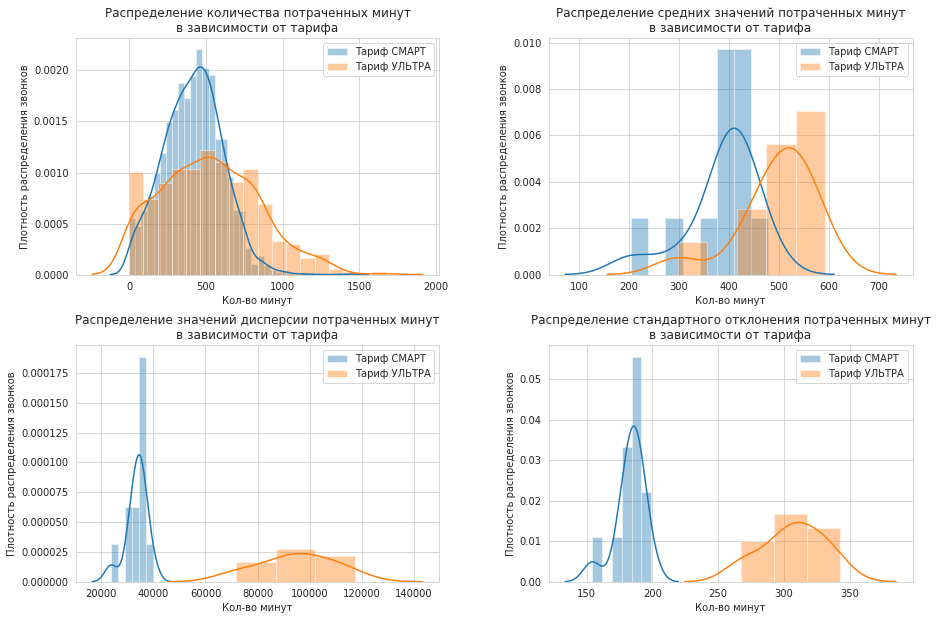

In [66]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.set_style('whitegrid')

plt.subplot(2, 2, 1)
sns.distplot(smart_users_only.duration_sum, label='Тариф СМАРТ')
sns.distplot(ultra_users_only.duration_sum, label='Тариф УЛЬТРА')

plt.title('Распределение количества потраченных минут\nв зависимости от тарифа')
plt.xlabel('Кол-во минут')
plt.ylabel('Плотность распределения звонков')
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
sns.distplot(smart_only.duration_mean, label='Тариф СМАРТ')
sns.distplot(ultra_only.duration_mean, label='Тариф УЛЬТРА')

plt.title('Распределение средних значений потраченных минут\nв зависимости от тарифа')
plt.xlabel('Кол-во минут')
plt.ylabel('Плотность распределения звонков')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
sns.distplot(smart_only.duration_var, label='Тариф СМАРТ')
sns.distplot(ultra_only.duration_var, label='Тариф УЛЬТРА')

plt.title('Распределение значений дисперсии потраченных минут\nв зависимости от тарифа')
plt.xlabel('Кол-во минут')
plt.ylabel('Плотность распределения звонков')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
sns.distplot(smart_only.duration_std, label='Тариф СМАРТ')
sns.distplot(ultra_only.duration_std, label='Тариф УЛЬТРА')

plt.title(
    'Распределение стандартного отклонения потраченных минут\nв зависимости от тарифа')
plt.xlabel('Кол-во минут')
plt.ylabel('Плотность распределения звонков')
plt.legend(loc='upper right');


***МИНУТЫ РАЗГОВОРА - Пользователи тарифа "УЛЬТРА" vs "СМАРТ" пользователей:***

- суммарно тратят меньше минут разговоров (но их и меньше количестсвенно)
- говорят дольше чем часть "СМАРТ" пользователей
- в среднем говорят больше 
- разброс значений больше - более 50% от средней величины т.е. есть те кто говорит сильно меньше чем в среднем 
все пользователи "УЛЬТРА". С клиентами тарифа "СМАРТ" ситуация лучше - разброс составляет меньше половины среднего
(особенно во второй половине года)
- выброс слева на первом графике у УЛЬТРА тарифа, видимо, те нулевые значения + значения ниже 1 минуты которые мы округлили до 1 минуты


**Гистограммы по позиции "количество потраченных мегабайт"**

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Отличные получились гистограммы! Молодец, что делаешь анализ графиков. 👍

Избавиться от предупреждений питона можно так:

`import warnings
 warnings.filterwarnings('ignore')`</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

Применила, наконец-то нет этого красного огромного окна с ошибкой. Спасибо) </div>

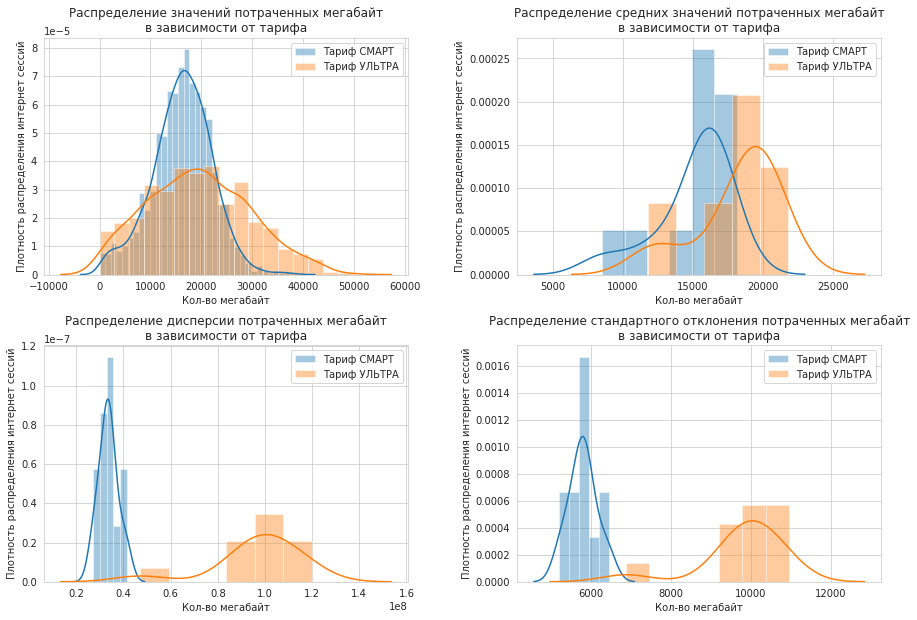

In [67]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.set_style('whitegrid')

plt.subplot(2, 2, 1)
sns.distplot(smart_users_only.mb_used_sum, label='Тариф СМАРТ')
sns.distplot(ultra_users_only.mb_used_sum, label='Тариф УЛЬТРА')

plt.title(
    'Распределение значений потраченных мегабайт\nв зависимости от тарифа')
plt.xlabel('Кол-во мегабайт')
plt.ylabel('Плотность распределения интернет сессий')
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
sns.distplot(smart_only.mb_used_mean, label='Тариф СМАРТ')
sns.distplot(ultra_only.mb_used_mean, label='Тариф УЛЬТРА')

plt.title(
    'Распределение средних значений потраченных мегабайт\nв зависимости от тарифа')
plt.xlabel('Кол-во мегабайт')
plt.ylabel('Плотность распределения интернет сессий')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
sns.distplot(smart_only.mb_used_var, label='Тариф СМАРТ')
sns.distplot(ultra_only.mb_used_var, label='Тариф УЛЬТРА')

plt.title(
    'Распределение дисперсии потраченных мегабайт\nв зависимости от тарифа')
plt.xlabel('Кол-во мегабайт')
plt.ylabel('Плотность распределения интернет сессий')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
sns.distplot(smart_only.mb_used_std, label='Тариф СМАРТ')
sns.distplot(ultra_only.mb_used_std, label='Тариф УЛЬТРА')

plt.title('Распределение стандартного отклонения потраченных мегабайт\nв зависимости от тарифа')
plt.xlabel('Кол-во мегабайт')
plt.ylabel('Плотность распределения интернет сессий')
plt.legend(loc='upper right');


**МЕГАБАЙТЫ - Пользователи тарифа "УЛЬТРА" vs "СМАРТ" пользователей:**

- суммарно тратят меньше мегабайт (но их и меньше количестсвенно)
- тратят больше мегабайт чем часть "СМАРТ" пользователей
- в среднем используют интернет больше  
- разброс значений больше - около 50% от средней величины т.е. есть те кто пользуется интернетом сильно меньше чем в среднем все пользователи "УЛЬТРА". С клиентами тарифа "СМАРТ" ситуация лучше - разброс составляет около 1/3 от среднего (особенно во второй половине года)

**Гистограммы по позиции "количество отправленых сообщений"**

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Здесь также - отличные гистограммы и выводы!</div>

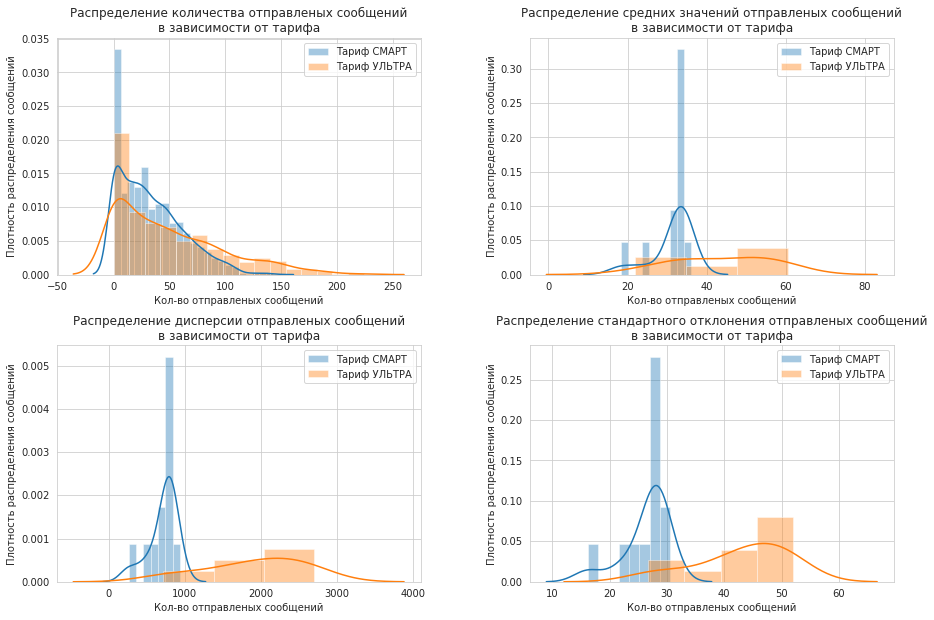

In [68]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
sns.set_style('whitegrid')

plt.subplot(2, 2, 1)
sns.distplot(smart_users_only.message_count, label='Тариф СМАРТ')
sns.distplot(ultra_users_only.message_count, label='Тариф УЛЬТРА')

plt.title(
    'Распределение количества отправленых сообщений\nв зависимости от тарифа')
plt.xlabel('Кол-во отправленых сообщений')
plt.ylabel('Плотность распределения сообщений')
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
sns.distplot(smart_only.message_mean, label='Тариф СМАРТ')
sns.distplot(ultra_only.message_mean, label='Тариф УЛЬТРА')

plt.title(
    'Распределение средних значений отправленых сообщений\nв зависимости от тарифа')
plt.xlabel('Кол-во отправленых сообщений')
plt.ylabel('Плотность распределения сообщений')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
sns.distplot(smart_only.message_var, label='Тариф СМАРТ')
sns.distplot(ultra_only.message_var, label='Тариф УЛЬТРА')

plt.title(
    'Распределение дисперсии отправленых сообщений\nв зависимости от тарифа')
plt.xlabel('Кол-во отправленых сообщений')
plt.ylabel('Плотность распределения сообщений')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
sns.distplot(smart_only.message_std, label='Тариф СМАРТ')
sns.distplot(ultra_only.message_std, label='Тариф УЛЬТРА')

plt.title('Распределение стандартного отклонения отправленых сообщений\nв зависимости от тарифа')
plt.ylabel('Плотность распределения сообщений')
plt.xlabel('Кол-во отправленых сообщений')
plt.legend(loc='upper right');

**СООБЩЕНИЯ - Пользователи тарифа "УЛЬТРА" vs "СМАРТ" пользователей:**

- можно говорить о том, что также мало пользуются СМС как и "СМАРТ" пользователей, хотя последние немногим больше за счет массовости.
- есть те кто отправялет больше СМС чем часть "СМАРТ" пользователей
- в среднем в первой половине года практически одинаково тратят запас СМС. Во второй половине года у клиентов "УЛЬТРА" наблюдается рост потребности в СМС примерно + 30-50%. 
- разброс значений в обоих тарифах сравним со средней величиной - фактически кто-то из пользователей может не пользоваться СМС почти совсем.

**Гистограммы по позиции "выручка"**

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Да, много пользователей вообще не пользуются СМС.</div>

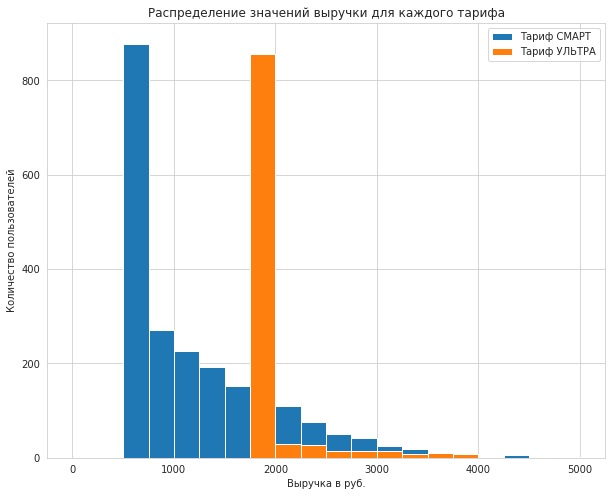

In [69]:
plt.figure(figsize=(10, 8))

smart_users_only.revenue.hist(bins=20, range=(0, 5000), label='Тариф СМАРТ')
ultra_users_only.revenue.hist(bins=20, range=(0, 5000), label='Тариф УЛЬТРА')
plt.title('Распределение значений выручки для каждого тарифа')
plt.legend()
plt.xlabel('Выручка в руб.')
plt.ylabel('Количество пользователей');

In [70]:
#Узнаем сколько в месяц выручка по каждому тарифу

tariff_sum = users_info.pivot_table(index=['tariff', 'month'], values='revenue', aggfunc='sum')
tariff_sum

revenue
tariff month         
smart  1        23853
       2        46583
       3        85902
       4       103072
       5       161310
       6       188043
       7       234164
       8       294941
       9       310958
       10      382630
       11      404428
       12      506134
ultra  1        17550
       2        47343
       3        74129
       4       109724
       5       137647
       6       170646
       7       191799
       8       221520
       9       231507
       10      252914
       11      278710
       12      295414

In [71]:
#Выручка за год (в пределах выборки)

tariff_sum_year = tariff_sum.groupby('tariff').sum()
tariff_sum_year

,revenue
tariff,
smart,2742018
ultra,2028903


In [72]:
"Выручка по тарифу Смарт больше на {:.1%}".format(1-2029614/2788737)


'Выручка по тарифу Смарт больше на 27.2%'

**Сколько всего пользователей каждого тарифа**

In [73]:
users.tariff.value_counts()



smart    351
ultra    149
Name: tariff, dtype: int64

**Итоги анализа поведения пользователей в зависимости от тарифа:**
1. Общая картина - пользователи дешевого тарифа "Смарт" суммарно потребляют услуг примерно в 1,5-2 раза больше, чем те кто пользуется тарифом "УЛЬТРА" (если сравнивать помесячно).
2. Потребление услуг связи растет от января до декабря. Причем в суммарных величинах разница между первым и четвертым кварталами для тарифа СМАРТ до 8-10 раз, для тарифа "УЛЬТРА" до 4-8 раз.

*ЗВОНКИ*
- Пользователи тарифа "УЛЬТРА" суммарно тратят меньше минут разговоров, но говорят дольше чем часть "СМАРТ" пользователей
- Пользователи тарифа "УЛЬТРА" в среднем говорят больше чем "СМАРТ" пользователи
- Разброс значений для времени разговора в тарифе "УЛЬТРА" больше 50% от средней величины, т.е. есть те клиенты кто говорит сильно меньше чем в среднем пользователи "УЛЬТРА".
- Клиенты тарифа "СМАРТ" пользуются связью более менее в одинаковом объеме, ситуация лучше - разброс составляет меньше половины среднего (особенно во второй половине года).

*МЕГАБАЙТЫ*
- Пользователи тарифа "УЛЬТРА" суммарно тратят меньше мегабайт (но их и меньше количестсвенно)
- Некоторые пользователи тарифа "УЛЬТРА" тратят больше мегабайт чем часть "СМАРТ" пользователей
- Пользователи тарифа "УЛЬТРА", в среднем, в месяц, используют интернет больше чем "СМАРТ" пользователи.
- Та же ситуация что и со звонками - разброс значений в "УЛЬТРА" пользователях больше - около 50% от средней величины т.е. есть те кто пользуется интернетом сильно меньше чем в среднем пользователи "УЛЬТРА".
- С клиентами тарифа "СМАРТ" ситуация лучше - разброс составляет около 1/3 от среднего (особенно во второй половине года)

*СООБЩЕНИЯ*
- Пользователи тарифа "УЛЬТРА" и "СМАРТ" одинаково мало пользуются СМС, хотя последние немногим больше за счет массовости.
- Некоторые пользователи тарифа "УЛЬТРА" отправлют больше СМС чем часть "СМАРТ" пользователей
- Пользователи тарифа "УЛЬТРА" и "СМАРТ" в первой половине года практически одинаково тратят запас СМС. Во второй половине года у клиентов "УЛЬТРА" наблюдается рост потребности в СМС примерно + 30-50%.
- Разброс значений в обоих тарифах сравним со средней величиной - фактически кто-то из пользователей может не пользоваться СМС почти совсем.

*ВЫРУЧКА*
- По базе "СМАРТ" пользователя 351 человек, что более чем в два раза больше чем пользователей "УЛЬТРА" - 149 человек
- Общая выручка по тарифу "СМАРТ" больше на 27 процентов за год (в пределах предоставленной выборки).
- Примерно одинаковое количество пользователей двух тарифов обходится месячной абонентской платой.
- Единицы пользователей "УЛЬТРА" доплачивают за услуги.
- "СМАРТ" пользователя гораздо чаще доплачивают за минуты, мегабайты и сообщения, увеличивая тем самым общую выручку.

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Отличный подробный вывод в конце раздела. 👍</div>

# Проверка гипотез

Необходимо проверить две гипотезы:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Гипотеза 1:
Нулевая гипотеза H₀:
**Средняя выручка пользователей тарифов "Ультра" и "Смарт" РАЗЛИЧАЮТСЯ**

Альтернативная гипотеза H₁: **Средняя выручка пользователей тарифов «Ультра» и «Смарт» РАВНЫ**


Поготовим данные по выручке. Нам нужно два массива - по выручке тарифа "Ульра" и "Смарт"

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

Необходимо сформулировать нулевую и альтернативную гипотезу.</div>

<p>
<div class="alert-info">
<b>Комментарий студента</b>

2 гипотезы сформулированы </div>

<div class="alert-warning">
<b>Комментарий ревьюера V2 ⚠️</b>

Нулевая гипотеза формулируется как равенство средних по выборкам.</div>

In [74]:
revenue_smart = users_info.loc[users_info['tariff']
                                      == 'smart', 'revenue']
revenue_smart.head()  # проверка

8     1149
9      550
10     550
11     983
12    1518
Name: revenue, dtype: int64

In [75]:
revenue_smart.count()

2229

In [76]:
revenue_ultra = users_info.loc[users_info['tariff']
                                      == 'ultra', 'revenue']
revenue_ultra.tail()  # проверка

3204    1950
3205    1950
3206    1950
3207    1950
3213    1950
Name: revenue, dtype: int64

In [77]:
revenue_ultra.count()

985

In [78]:
#Проверяем гипотезу: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"
import scipy.stats as st
alpha = 0.01  # уровень статистической значимости

results = st.ttest_ind(revenue_smart, revenue_ultra, equal_var=False)
print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.15685967415715e-299
Отвергаем нулевую гипотезу


<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

Некоторые блоки кода не работают. Посмотри, пожалуйста, что пошло не так. Перед отправкой проекта стоит проверять работоспособность кода — это можно сделать, нажав на панели Jupiter Hub ``Kernel`` и ``Restart & Run All`` (см скриншот ниже).
![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)</div>

<div class="alert-success">
<b>Комментарий ревьюера V2 ✔️</b>

Ошибка исправлена, код работает! 👍</div>

**Гипотеза верна - средние выручки двух тарифов различаются.**

Гипотеза 2:
"Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
Исходя из формулировки гипотезы принимаем нулевую гипотезу H₀ как:
**Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов**

Альтернативная гипотеза: **Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Уровень значимости (пороговое значение) установим как 5% (как общепринятый параметр)

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

Здесь нулевая и альтернативная гипотезы сформулированы верно!</div>

In [79]:
revenue_moscow = users_info.loc[users_info['city']
                                       == 'Москва', 'revenue']

print(revenue_moscow.count()) 
revenue_other = users_info.loc[users_info['city']
                                      != 'Москва', 'revenue']
revenue_other.count()

611


2603

In [80]:
alpha = 0.05  # уровень статистической значимости

results = st.ttest_ind(revenue_moscow, revenue_other, equal_var=False)
print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.44996175753638024
Не получилось отвергнуть нулевую гипотезу


**Вероятность нулевой гипотезы очень велика, поэтому мы не можем ее отбростить и сказать, что выручка абонентов из Москвы достаточно сильно откличается от пользователей других городов.**

# Заключение


**Данные для проведения исследования**
- Все данные для расчетов хорошо подготовлены, не считая тех. сбоя в данных по звонкам (0 минут разговора). 
- В отношении возраста клиентов выборка репрезентативная - распеределение возраста клиента близко к нормальному и охватывает весь диапазон возрастов полной дееспособности.

**Расчеты**
- Общая картина - пользователи дешевого тарифа "Смарт" суммарно потребляют услуг примерно в 1,5-2 раза больше, чем те кто пользуется тарифом "УЛЬТРА" (если сравнивать помесячно).
- Потребление услуг связи растет от января до декабря. Причем в суммарных величинах разница между первым и четвертым кварталами для тарифа СМАРТ до 8-10 раз, для тарифа "УЛЬТРА" до 4-8 раз.

**Анализ выдвинутых гипотез**
- Гипотеза: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается". Полностью подтвердилась с заданным уровнем статистической значимости = 1%.
- Гипотеза: "Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов". Гипотеза подтвердилась.

**Итог** 
- Оба тарифа имеют свою аудиторию и заполняют определенную нишу на рынке.
- Больше денег приносит тариф "СМАРТ" за счет своей массовости (дешевизны по сравнению с "УЛЬТРА")
- Логично было бы вкладывать больше средств в рекламную кампанию тарифа "СМАРТ", чтобы обеспечить приток дополнительных клиентов.
- Обеспечить приток клиентов на "УЛЬТРА" крайне сложно без снижения стоимости тарифа. Эти клиенты практически ничего дополнительно не покупают. В этом случае прямые убытки будут из-за уменьшения выручки и не очевидного прироста клиентской базы.


<div style="border:solid lightblue 3px; padding: 20px">
<b>Общий комментарий ревьюера:</b>

У тебя получилась очень сильная работа, ты отлично справилась с обработкой данных, приведением их к нужному типу и объединением таблиц, анализом использования различных услуг клиентами.
    
Также мне понравилось, что ты делаешь выводы после каждого шага. Отдельно хочу отметить твое умение строить графики и правильно их комментировать.
    
Есть критическое замечание - по округлению и звонкам с нулевой длительностью, округлению интернет сессий. Также нужно сформулировать нулевую и альтернативную гипотезы перед проверкой. Ближе к концу работы код упал (вероятно не загрузила нужную библиотеку), проверь пожалуйста.
    
Буду ждать твой доработанный проект.</div>

<div style="border:solid lightblue 3px; padding: 20px">
<b>Комментарий студента:</b>

Спасибо за оставленные комментарии. Они были для меня полезны и важны. Я постаралась исправить большую часть, но, к сожалению, не все (взяла себе на заметку). Надеюсь, что текущие исправления верны) </div>

<div style="border:solid lightblue 3px; padding: 20px">
<b>Общий комментарий ревьюера V2</b>

Ты исправила критические замечания, теперь твой проект выглядит хорошо!

Успехов в дальнейшем обучении!

</div>